#  Chamberline-KimStatic Model

### Version 0.9

<p style="text-align:justify;">
Chamberlin-Kim static model is an empirical equation which was developed to fit the experimental cell potential (E) vs. current density (J) data for proton exchange membrane fuel cells (PEMFCs), at several temperatures, pressures, and oxygen compositions in the cathode gas mixture. The exponential term compensates for the mass-transport regions of the V vs. i plot; i.e., the increase in slope of the pseudolinear region and the subsequent rapid fall-off of the cell potential with increasing current density. The terms E0 and b yield the electrode kinetic parameters for oxygen reduction in the PEMFC and R represents the resistance, predominantly ohmic and, to a small extent, the charge transfer resistance of the electro-oxidation of hydrogen. The exponential term characterizes the mass-transport region of the V vs. i plot. The parameter n has more pronounced effects than the parameter m in this region. In Chamberline Kim’s model, the values of the parameters(five parameters: E0, b, R, m, n) vary depending on many variables, including the composition of the Membrane Electrode Assemblies(MEA), the fuel and oxidant used, besides the local temperature, pressure, and humidity of the MEA. They also depend on the stack itself, so that it can not be transposed to another fuel cell without new parameter identification.
</p>

<div style="text-align:center;">
   
<img src="images/Static-Model-Graphic.jpg">  
<p style="text-align:center;">Fig1. Graphical Abstract of Static Models</p>
</div>

## Vcell

$$V_{cell}=E_0-b\times ln(J)-(R\times J)-m\times exp(nJ)$$


$$J=\frac{i}{A}$$

In [1]:
from opem.Static.Chamberline_Kim import Vcell_Calc
Vcell=Vcell_Calc(E0=0.982,b=0.0689,R=0.328,m=0.000125,n=9.45,i=1,A=50.0)
Vcell

1.244827379954939

* Notice : from opem.Chamberline_Kim in version (0.3>)

### VStack

$$V_{Stack}=N\times V_{cell}$$

In [2]:
from opem.Static.Chamberline_Kim import VStack_Calc
VStack=VStack_Calc(Vcell=Vcell,N=1)
VStack

1.244827379954939

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Stack}=N\times P$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [3]:
from opem.Static.Chamberline_Kim import Power_Calc,PowerStack_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=Vcell,i=2)
Power

2.489654759909878

In [4]:
PowerStack_Calc(Power=Power,N=2)

4.979309519819756

In [5]:
Power_Thermal_Calc(VStack=VStack,N=2,i=2)

2.430345240090122

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{cell}}{HHV}$$

In [6]:
from opem.Static.Chamberline_Kim import Efficiency_Calc
Efficiency_Calc(Vcell=Vcell)

0.797966269201884

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=1 to `i`=42.5 with `step`=0.1

In [7]:
Test_Vector = {
    "A": 50.0,
    "E0": 0.982,
    "b": 0.0689,
    "R": 0.328,
    "m": 0.000125,
    "n": 9.45,
    "N": 1,
    "i-start": 1,
    "i-stop": 42.5,
    "i-step": 0.1,
    "Name": "Chamberline_Test"}

* Notice : "Name", new in version 0.5

In [8]:
from opem.Static.Chamberline_Kim import Static_Analysis
data=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Chamberline-Kim-Model Simulation
###########
Analyzing . . .
I : 1
PEM Efficiency : 0.797966269201884 
Power : 1.244827379954939 W
Power-Stack : 1.244827379954939 W
Power-Thermal : -0.01482737995493899 W
VStack : 1.244827379954939 V
Vcell : 1.244827379954939 V
###########
I : 1.1
PEM Efficiency : 0.7933343765568479 
Power : 1.3613617901715511 W
Power-Stack : 1.3613617901715511 W
Power-Thermal : -0.008361790171551031 W
VStack : 1.2376016274286827 V
Vcell : 1.2376016274286827 V
###########
I : 1.2
PEM Efficiency : 0.7890689791314186 
Power : 1.4771371289340156 W
Power-Stack : 1.4771371289340156 W
Power-Thermal : -0.0011371289340155854 W
VStack : 1.230947607445013 V
Vcell : 1.230947607445013 V
###########
I : 1.3
PEM Efficiency : 0.7851113286904084 
Power : 1.5922057745841485 W
Power-Stack : 1.5922057745841485 W
Power-Thermal : 0.006794225415851485 W
VStack : 1.2247736727570373 V
Vcell : 1.2247736727570373 V
###########
I : 1.4
PEM Efficiency : 0.7814157591393215 
Power : 1.70

###########
I : 31.4
PEM Efficiency : 0.4877136025324792 
Power : 23.89016310645096 W
Power-Stack : 23.89016310645096 W
Power-Thermal : 14.731836893549037 W
VStack : 0.7608332199506675 V
Vcell : 0.7608332199506675 V
###########
I : 31.5
PEM Efficiency : 0.4865749291945478 
Power : 23.91029202062008 W
Power-Stack : 23.91029202062008 W
Power-Thermal : 14.83470797937992 W
VStack : 0.7590568895434946 V
Vcell : 0.7590568895434946 V
###########
I : 31.6
PEM Efficiency : 0.4854256781187993 
Power : 23.92954422854433 W
Power-Stack : 23.92954422854433 W
Power-Thermal : 14.93845577145567 W
VStack : 0.7572640578653269 V
Vcell : 0.7572640578653269 V
###########
I : 31.7
PEM Efficiency : 0.4842656361792864 
Power : 23.947904240338072 W
Power-Stack : 23.947904240338072 W
Power-Thermal : 15.043095759661927 W
VStack : 0.7554543924396868 V
Vcell : 0.7554543924396868 V
###########
I : 31.8
PEM Efficiency : 0.48309458626391927 
Power : 23.965356235380508 W
Power-Stack : 23.965356235380508 W
Power-Thermal

Done!


* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [9]:
data_2=Static_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Chamberline-Kim-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [10]:
Static_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Chamberline-Kim Simulation Failed!(Check Your Inputs)',
 'Status': False}

## Plot

In [11]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

In [12]:
def plot_func(x,y,x_label,y_label,color='green'):
    plt.figure()
    plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

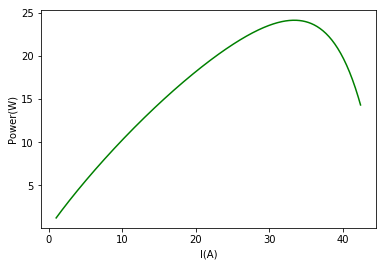

In [13]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

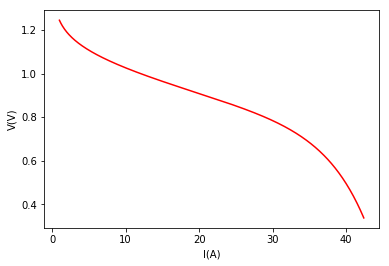

In [14]:
plot_func(data["I"],data["V"],"I(A)","V(V)","red")

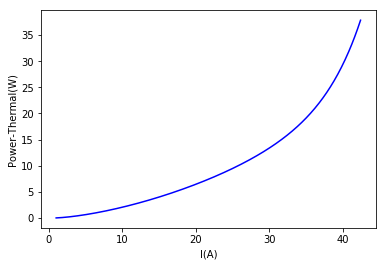

In [15]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

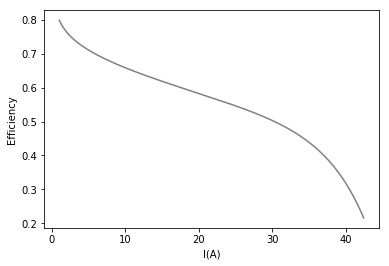

In [16]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

<a href="Chamberline-Kim/Chamberline_Test.html">HTML File</a>

<a href="Chamberline-Kim/Chamberline_Test.opem">OPEM File</a>

<a href="Chamberline-Kim/Chamberline_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User Input
2. System : Simulator Calculation (Middle Value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">Open circuit voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$b$$</td>
        <td style="text-align:center;">Tafel’s parameter for the oxygen reduction</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R$$</td>
        <td style="text-align:center;">Resistance</td>
        <td>$$\Omega cm^2$$</td>
         <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$m$$</td>
        <td style="text-align:center;">Diffusion’s parameters </td>
        <td>$$V$$</td>
         <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$n$$</td>
        <td style="text-align:center;">Diffusion’s parameters </td>
        <td>$$A^{-1}cm^2$$</td>
         <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$A$$</td>
        <td style="text-align:center;">Active area</td>
        <td>$$cm^2$$</td>
        <td>$$User$$</td>
    </tr>
    
    
    <tr>
        <td>$$N$$</td>
        <td style="text-align:center;">Number of single cells</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
    
         <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    
     <tr>
        <td>$$J$$</td>
        <td style="text-align:center;">Actual current density of the cell </td>
        <td>$$Acm^{-2}$$</td>
          <td>$$System$$</td>
    </tr>
    <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher Heating Value Potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
              <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical Potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

## Reference
<blockquote>
Junbom Kim, Seong-Min Lee, Supramaniam Srinivasan, Charles E. Chamberlin. 1995. "Modeling of Proton Exchange Membrane Fuel Cell Performance with an Empirical Equation." Journal of The Electrochemical Society (The Electrochemical Society) 142 (8): 2670-2674. doi:10.1149/1.2050072.
</blockquote>